In [1]:
import os
import mypackages.myrasters as mr
import netCDF4
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Specify the data directories where input data is stored and where output data will be stored:

In [2]:
data_dir = os.path.join('..', 'data')
out_dir = os.path.join('..', 'output/impact')

The data is in CDF format so we first need to open the dataset and then access the variables:

In [3]:
file_name = 'FAO/gaez/res03_ehb22020h_sihr0_wpo.tif'

area_raster = mr.MyRaster(os.path.join(data_dir, file_name))

In [4]:
area = area_raster.get_array().astype('int16')

In [5]:
area[area == 0] = -1
area[area == 9] = -1
area[area == 8] = 0
area[(area > 0) & (area < 6)] = 2
area[(area == 6) | (area == 7)] = 1

In [6]:
area = mr.cut_array_yboundaries(array=area, pixelHeight=area_raster.pixelHeight,
                                y_min_old=-90, y_min_new=-56, y_max_old=90, y_max_new=84)

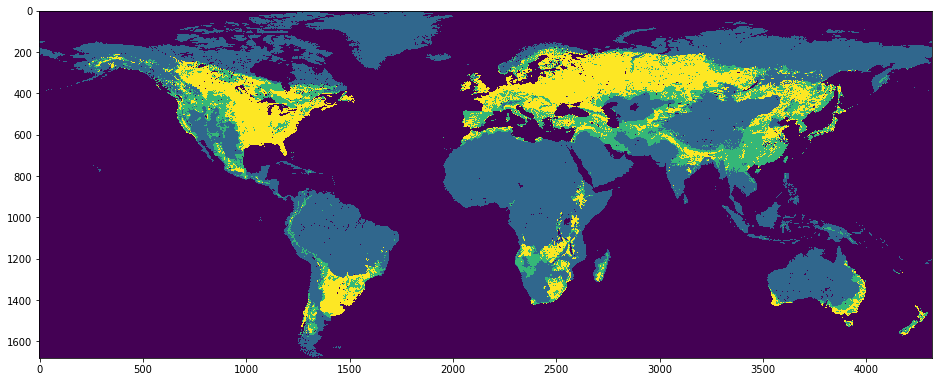

In [7]:
fig = plt.figure(figsize=(16,9))

plt.imshow(area);

In [8]:
out_filename = 'suitable_area'
mr.array2geotiff(area, os.path.join(out_dir, out_filename),
                 -1, area.shape[1], area.shape[0],
                 -180, 84, area_raster.pixelWidth, area_raster.pixelHeight)

In [9]:
nogo = np.zeros(area.shape)
nogo[area == 0] = 1

In [10]:
marginal = np.zeros(area.shape)
marginal[area == 1] = 1

In [11]:
file_name = 'impact_potato_pot_area.tif'

impact_raster = mr.MyRaster(os.path.join(out_dir, file_name))

In [12]:
impact = impact_raster.get_array()

In [13]:
shapefile_name = 'shapefiles/countries.shp'
shapefile = os.path.join(data_dir, shapefile_name)

In [14]:
gdf = gpd.read_file(shapefile)

In [15]:
filename = 'crop_area.shp'
gdf2 = gpd.read_file(os.path.join(out_dir, filename))

In [16]:
cdict1 = {'red':   ((0.0,  0.0, 0.0),
                    (1.0,  1.0, 1.0)),

          'green': ((0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)),

          'blue':  ((0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)),

          'alpha': ((0.0,  0.0, 0.0),
                    (1.0,  1.0, 1.0))}

In [17]:
plt.register_cmap(name='Red', data=cdict1)

In [18]:
cdict2 = {'red':   ((0.0,  0.0, 0.0),
                    (1.0,  0.4, 0.4)),

          'green': ((0.0,  0.0, 0.0),
                    (1.0,  0.8, 0.8)),

          'blue':  ((0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)),

          'alpha': ((0.0,  0.0, 0.0),
                    (1.0,  1.0, 1.0))}

In [19]:
plt.register_cmap(name='Green', data=cdict2)

In [20]:
np.percentile(impact[impact >= 0], 0.98)

0.0033267224207520485

In [21]:
vmin = 0
vmax = 0.5

CPU times: user 2min 21s, sys: 5.22 s, total: 2min 27s
Wall time: 2min 27s


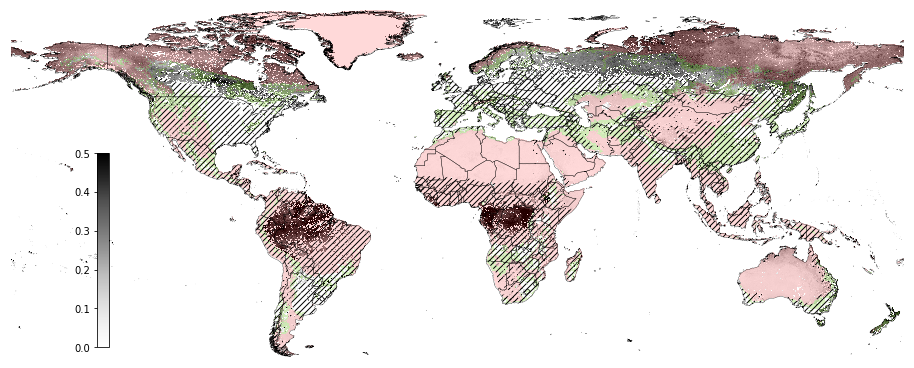

In [25]:
%%time

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

ax.set_xlim([-180, 180])
ax.set_ylim([-56, 84])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

gdf.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0.3)

gdf2.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0, hatch='////')

ax.imshow(impact, extent=[-180, 180, -56, 84], cmap='Greys', vmin=vmin, vmax=vmax)

ax.imshow(nogo, extent=[-180, 180, -56, 84], cmap='Red', alpha=0.15)

ax.imshow(marginal, extent=[-180, 180, -56, 84], cmap='Green', alpha=0.25)

norm = matplotlib.colors.Normalize(vmin, vmax, clip = False)

cax1 = fig.add_axes([0.2, 0.25, 0.01, 0.3]) # xmin, ymin, dx, dy
matplotlib.colorbar.ColorbarBase(cax1, cmap='Greys', norm=norm)
cax1.yaxis.set_ticks_position('left')

plt.savefig(os.path.join(out_dir, 'impact_potato_pot_area.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

In [26]:
filename = 'crop_area.shp'
gdf2 = gpd.read_file(os.path.join(out_dir, filename))

KeyboardInterrupt: 

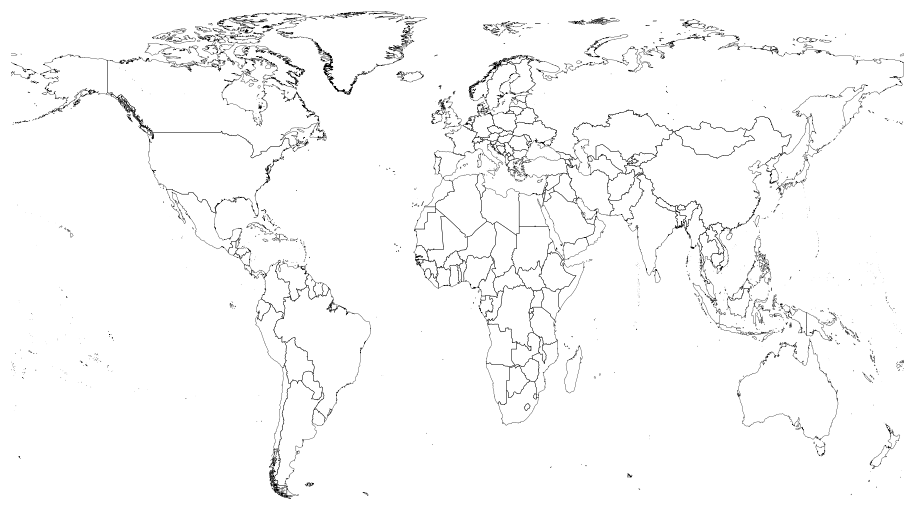

In [29]:
%%time

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

ax.set_xlim([-180, 180])
ax.set_ylim([-56, 84])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

gdf.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0.3)

gdf2.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0, hatch='////')

ax.imshow(impact, extent=[-180, 180, -56, 84], cmap='Greys', vmin=vmin, vmax=vmax)

ax.imshow(nogo, extent=[-180, 180, -56, 84], cmap='Red', alpha=0.15)

ax.imshow(marginal, extent=[-180, 180, -56, 84], cmap='Green', alpha=0.25)

norm = matplotlib.colors.Normalize(vmin, vmax, clip = False)

cax1 = fig.add_axes([0.2, 0.25, 0.01, 0.3]) # xmin, ymin, dx, dy
matplotlib.colorbar.ColorbarBase(cax1, cmap='Greys', norm=norm)
cax1.yaxis.set_ticks_position('left')

plt.savefig(os.path.join(out_dir, 'impact_potato_pot_area.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)